In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook,tqdm


In [2]:
train_files = os.listdir('../audioData/train/')
val_files = os.listdir('../audioData/val/')
test_files = os.listdir('../audioData/test1/')
test_files_2 = os.listdir('../audioData/test2/')
test_private = os.listdir('../audioData/test_private/')

In [3]:
train_files = [file for file in train_files if 'wav' in file]
val_files = [file for file in val_files if 'wav' in file]
test_files = [file for file in test_files if 'wav' in file]
test_files_2 = [file for file in test_files_2 if 'wav' in file]
test_private = [file for file in test_private if 'wav' in file]

In [29]:
os.makedirs('../audioData/train_process/',exist_ok=True)
for file in tqdm(train_files):
    y,sr=librosa.load('../audioData/train/'+file,sr=44100,mono=False)
    y=librosa.to_mono(y)
    itvs = librosa.effects.split(y,frame_length =16384, hop_length =1024,top_db = 20)
    yt=[]
    for st,ed in itvs:
        yt.append(y[st:ed])
    yt = np.concatenate(yt)
    np.save('../audioData/train_process/'+file[:-4]+'.npy',yt)

100%|██████████| 44353/44353 [13:00<00:00, 56.80it/s]


In [4]:
os.makedirs('../audioData/val_process/',exist_ok=True)
for file in tqdm(val_files):
    y,sr=librosa.load('../audioData/val/'+file,sr=44100,mono=False)
    y=librosa.to_mono(y)
    itvs = librosa.effects.split(y,frame_length =16384, hop_length =1024,top_db = 20)
    yt=[]
    for st,ed in itvs:
        yt.append(y[st:ed])
    yt = np.concatenate(yt)
    np.save('../audioData/val_process/'+file[:-4]+'.npy',yt)

100%|██████████| 5390/5390 [01:21<00:00, 65.88it/s]


In [4]:
os.makedirs('../audioData/test1_process/',exist_ok=True)
for file in tqdm(test_files):
    y,sr=librosa.load('../audioData/test1/'+file,sr=44100,mono=False)
    y=librosa.to_mono(y)
    itvs = librosa.effects.split(y,frame_length =16384, hop_length =1024,top_db = 20)
    yt=[]
    for st,ed in itvs:
        yt.append(y[st:ed])
    yt = np.concatenate(yt)
    np.save('../audioData/test1_process/'+file[:-4]+'.npy',yt)

100%|██████████| 2734/2734 [00:28<00:00, 94.28it/s] 


In [12]:
os.makedirs('../audioData/test2_process/',exist_ok=True)
for file in tqdm(test_files_2):
    y,sr=librosa.load('../audioData/test2/'+file,sr=44100,mono=False)
    y=librosa.to_mono(y)
    itvs = librosa.effects.split(y,frame_length =16384, hop_length =1024,top_db = 20)
    yt=[]
    for st,ed in itvs:
        yt.append(y[st:ed])
    yt = np.concatenate(yt)
    np.save('../audioData/test2_process/'+file[:-4]+'.npy',yt)

100%|██████████| 2847/2847 [00:30<00:00, 94.55it/s]


In [4]:
os.makedirs('../audioData/test_private_process/',exist_ok=True)
for file in tqdm(test_private):
    y,sr=librosa.load('../audioData/test_private/'+file,sr=44100,mono=False)
    y=librosa.to_mono(y)
    itvs = librosa.effects.split(y,frame_length =16384, hop_length =1024,top_db = 20)
    yt=[]
    for st,ed in itvs:
        yt.append(y[st:ed])
    yt = np.concatenate(yt)
    np.save('../audioData/test_private_process/'+file[:-4]+'.npy',yt)

100%|██████████| 505/505 [00:03<00:00, 163.11it/s]


In [5]:
val_process_files = os.listdir('../audioData/val_process/')

In [12]:
l = []
for file in val_process_files:
    x = np.load('../audioData/val_process/' + file)
    l.append(len(x))

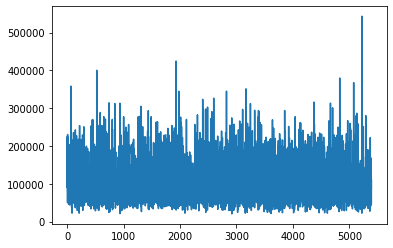

In [13]:
plt.plot(l)

In [8]:
train_process_files = os.listdir('../audioData/train_process/')

In [9]:
l = []
for file in train_process_files:
    x = np.load('../audioData/train_process/' + file)
    l.append(len(x))

KeyboardInterrupt: 

In [4]:
label2emo={'hap':0,'ang':1,'dis':2,'fea':3,'sad':4,'neu':5,'sur':6}

In [6]:
z = [0]*7
for file in val_process_files:
    label = file.split('.')[0].split('-')[-1]
    z[label2emo[label]]+=1

In [7]:
z

[627, 759, 810, 581, 826, 1094, 693]

In [10]:
z = [0]*7
for file in train_process_files:
    label = file.split('.')[0].split('-')[-1]
    z[label2emo[label]]+=1

In [11]:
z

[5111, 6387, 6785, 4864, 6659, 9167, 5380]

In [3]:
44353/np.array([5111, 6387, 6785, 4864, 6659, 9167, 5380])

array([8.67794952, 6.94426178, 6.53691968, 9.11862664, 6.6606097 ,
       4.83833315, 8.24405204])

In [13]:
label2emo={'hap':0,'ang':1,'dis':2,'fea':3,'sad':4,'neu':5,'sur':6}

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female)

In [11]:
file

'03-02-01-01-01-01-24.wav'

In [5]:
train_extra_files = dict()
for i in range(1,25):
    z = str(i).zfill(2)
    train_extra_files[i] = os.listdir('../audioData/train_extra/Actor_%s'%z)    
    

In [6]:
for i in range(1,25):
    z = str(i).zfill(2)
    for file in tqdm(train_extra_files[i]):
        y,sr=librosa.load('../audioData/train_extra/Actor_%s/'%z+file,sr=44100)
        # y=librosa.to_mono(y)
        itvs = librosa.effects.split(y,frame_length =16384, hop_length =1024,top_db = 20)
        yt=[]
        for st,ed in itvs:
            yt.append(y[st:ed])
        yt = np.concatenate(yt)
        
        label = int(file.split('-')[2])
        
        if label == 1 :
            label = 'neu'
        if label == 2:
            continue
        elif label == 3:
            label = 'hap'
        elif label == 4:
            label = 'sad'
        elif label == 5:
            label = 'ang'
        elif label == 6:
            label = 'fea'
        elif label == 7:
            label = 'dis'
        elif label == 8:
            label = 'fea'
        
#         label = label2emo[label]
        
        np.save('../audioData/train_process/'+file[:-4]+'-%s.npy'%label,yt)

100%|██████████| 44/44 [00:07<00:00,  5.84it/s]
0it [00:00, ?it/s]
100%|██████████| 44/44 [00:07<00:00,  6.10it/s]


In [8]:
for i in range(1,25):
    z = str(i).zfill(2)
    for file in tqdm(train_extra_files[i]):
        label = int(file.split('-')[2])
        
        if label == 1 :
            label = 'neu'
        if label == 2:
            continue
        elif label == 3:
            label = 'hap'
        elif label == 4:
            label = 'sad'
        elif label == 5:
            label = 'ang'
        elif label == 6:
            label = 'fea'
        elif label == 7:
            label = 'dis'
        elif label == 8:
            label = 'fea'
        
        label = label2emo[label]
        file_dir = '../audioData/train_process/'+file[:-4]+'-%d.npy'%label
#         print(file_dir)
        os.remove(file_dir)

100%|██████████| 44/44 [00:00<00:00, 12604.11it/s]
0it [00:00, ?it/s]
100%|██████████| 44/44 [00:00<00:00, 12082.58it/s]


In [24]:
h = np.array([5111, 6387, 6785, 4864, 6659, 9167, 5380])
np.sum(h)

44353

In [25]:
l =0
for i in range(1,25):
    z = str(i).zfill(2)
    for file in tqdm(train_extra_files[i]):
        label = int(file.split('-')[2])
        
        if label == 1 :
            label = 'neu'
        if label == 2:
            label = 'calm'
            l +=1
            continue
        elif label == 3:
            label = 'hap'
        elif label == 4:
            label = 'sad'
        elif label == 5:
            label = 'ang'
        elif label == 6:
            label = 'fea'
        elif label == 7:
            label = 'dis'
        elif label == 8:
            label = 'fea'
        
        label = label2emo[label]
        h[label]+=1

100%|██████████| 44/44 [00:00<00:00, 101456.50it/s]
0it [00:00, ?it/s]
100%|██████████| 44/44 [00:00<00:00, 107109.33it/s]


In [22]:
h

array([5295, 6571, 6785, 5048, 6843, 9259, 5380])

In [23]:
np.sum(h)

45181

In [1]:
import os
import librosa
import numpy as np
import librosa.display

%matplotlib inline

In [34]:
os.makedirs('./train_process_mel/',exist_ok=True)
sr=44100
file = os.listdir('./train_process/')[0]
yt = np.load('./train_process/'+file)
yS = np.abs(librosa.core.stft(yt,n_fft=2048, hop_length=512))
# yS = librosa.feature.melspectrogram(S=librosa.amplitude_to_db(yS),sr=sr,n_mels=128,
#                                         n_fft=2048, hop_length=512,fmax=8000,fmin=60)
# np.save('./train_process_mel/'+file,yS)

In [35]:
log_mel = librosa.feature.melspectrogram(S=librosa.amplitude_to_db(yS),sr=sr,n_mels=128,
                                        n_fft=2048, hop_length=512,fmax=8000,fmin=60)

In [36]:
mel_log = librosa.power_to_db(librosa.feature.melspectrogram(S=yS,sr=sr,n_mels=128,
                                        n_fft=2048, hop_length=512,fmax=8000,fmin=60))

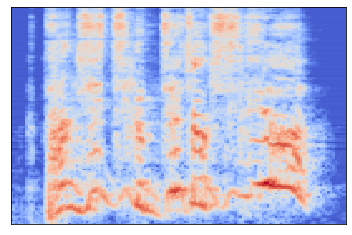

In [5]:
librosa.display.specshow(log_mel)

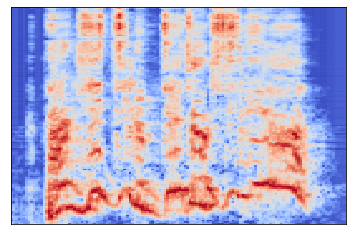

In [6]:
librosa.display.specshow(librosa.util.normalize(log_mel))

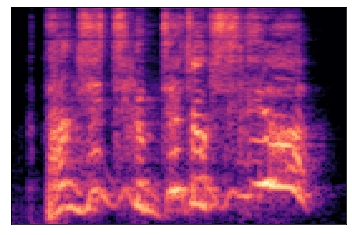

In [32]:
librosa.display.specshow(mel_log)

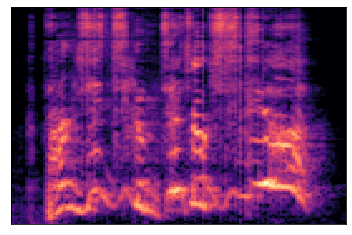

In [33]:
librosa.display.specshow(librosa.util.normalize(mel_log))

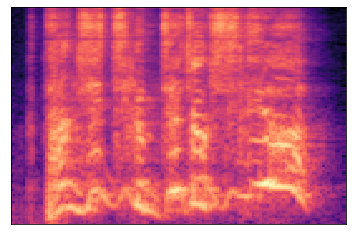

In [28]:
librosa.display.specshow(mel_log)

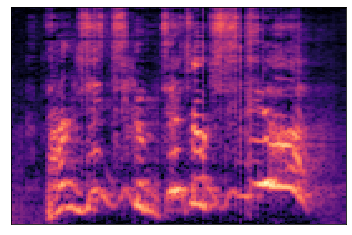

In [37]:
librosa.display.specshow(librosa.util.normalize(mel_log))

In [15]:
np.abs(librosa.util.normalize(mel_log)).std()

0.25727642

In [17]:
np.abs(librosa.util.normalize(log_mel)).std()

0.30324513

In [22]:
np.random.uniform(0,0.15)

0.12991747550705393

In [16]:
librosa.util.normalize((yS-yS.min())/(yS.max()-yS.min()))[:,0].sum()

28.552305

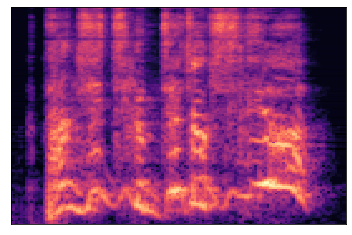

In [17]:
librosa.display.specshow((yS-yS.min())/(yS.max()-yS.min()))

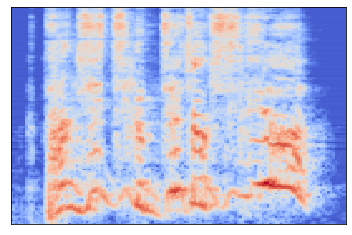

In [4]:
librosa.display.specshow(yS)

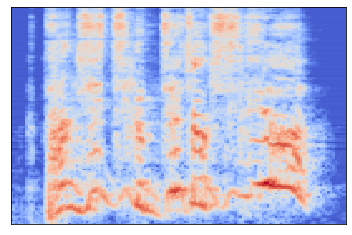

In [42]:
librosa.display.specshow(yS)

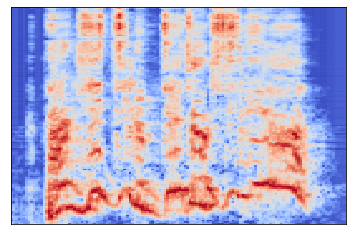

In [43]:
librosa.display.specshow(librosa.util.normalize(yS))

In [3]:
import multiprocessing

In [4]:
%%time
os.makedirs('./train_process_mel/',exist_ok=True)
sr=44100
def process(file):
    yt = np.load('./train_process/'+file)
    yS = np.abs(librosa.core.stft(yt,n_fft=2048, hop_length=512))
    yS = librosa.amplitude_to_db(librosa.feature.melspectrogram(S=yS,sr=sr,n_mels=128,
                                            n_fft=2048, hop_length=512,fmax=8000,fmin=60))
    np.save('./train_process_mel/'+file,yS)
pool = multiprocessing.Pool(multiprocessing.cpu_count())
pool.map(process,os.listdir('./train_process/'))

CPU times: user 207 ms, sys: 274 ms, total: 481 ms
Wall time: 2min


In [18]:
os.makedirs('./val_process_mel/',exist_ok=True)
sr=44100
for file in os.listdir('./val_process/'):
    yt = np.load('./val_process/'+file)
    yS = np.abs(librosa.core.stft(yt,n_fft=2048, hop_length=512))
    yS = librosa.amplitude_to_db(librosa.feature.melspectrogram(S=yS,sr=sr,n_mels=128,
                                            n_fft=2048, hop_length=512,fmax=8000,fmin=60))
    np.save('./val_process_mel/'+file,yS)

In [19]:
os.makedirs('./test1_process_mel/',exist_ok=True)
sr=44100
for file in os.listdir('./test1_process/'):
    yt = np.load('./test1_process/'+file)
    yS = np.abs(librosa.core.stft(yt,n_fft=2048, hop_length=512))
    yS = librosa.amplitude_to_db(librosa.feature.melspectrogram(S=yS,sr=sr,n_mels=128,
                                            n_fft=2048, hop_length=512,fmax=8000,fmin=60))
    np.save('./test1_process_mel/'+file,yS)

In [20]:
os.makedirs('./test2_process_mel/',exist_ok=True)
sr=44100
for file in os.listdir('./test2_process/'):
    yt = np.load('./test2_process/'+file)
    yS = np.abs(librosa.core.stft(yt,n_fft=2048, hop_length=512))
    yS = librosa.amplitude_to_db(librosa.feature.melspectrogram(S=yS,sr=sr,n_mels=128,
                                            n_fft=2048, hop_length=512,fmax=8000,fmin=60))
    np.save('./test2_process_mel/'+file,yS)

In [6]:
os.makedirs('../audioData/test_private_process_mel/',exist_ok=True)
sr=44100
for file in os.listdir('../audioData/test_private_process/'):
    yt = np.load('../audioData/test_private_process/'+file)
    yS = np.abs(librosa.core.stft(yt,n_fft=2048, hop_length=512))
    yS = librosa.amplitude_to_db(librosa.feature.melspectrogram(S=yS,sr=sr,n_mels=128,
                                            n_fft=2048, hop_length=512,fmax=8000,fmin=60))
    np.save('../audioData/test_private_process_mel/'+file,yS)